In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Value Iteration Mario
<p style="color:blue;">
By Pramod Sharma : pramod.sharma@prasami.com
<p>

## Acknowledgements
### Standford University<br>
Inspired from: https://github.com/lazyprogrammer/machine_learning_examples/tree/master/rl

In [2]:
# Import statements

import numpy as np
import os
import matplotlib.pyplot as plt

from utils.gridWorldGame import standard_grid, negative_grid,print_values, print_policy

<img src = './images/mario_game.png'>

In [3]:
# Some basic parameters
inpDir = '../input'
outDir = '../output'

RANDOM_STATE = 24
STEPS = 200

# parameters for Matplotlib
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (9, 6),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'
         }

plt.rcParams.update(params)


SMALL_ENOUGH = 1e-3
GAMMA = 0.95
ALL_POSSIBLE_ACTIONS = ('U', 'D', 'L', 'R')

In [4]:
# Helper function to plot the grid

def show_grid(val):
    plot_grid = np.zeros(12, dtype = np.float).reshape(3,4)
    for key in val:
        plot_grid[key[0],key[1]] = val[key]
    plot_grid[0,3] = 1
    plot_grid[1,3] = -1
    plot_grid[1,1] = 0
    print ( plot_grid)
    plt.matshow(plot_grid, cmap = 'RdBu');

In [5]:
# Lets create a Grid for our Mario
grid = negative_grid()
print("Rewards:")
print_values(grid.rewards, grid)

Rewards:
---------------------------
-0.10|-0.10|-0.10| 1.00|
---------------------------
-0.10| 0.00|-0.10|-1.00|
---------------------------
-0.10|-0.10|-0.10|-0.10|


## Actions

In [6]:
# Note: Grid Action keys are defined along with the grid
# What are the keys?
print ("Action Keys:", grid.actions.keys())

Action Keys: dict_keys([(0, 0), (0, 1), (0, 2), (1, 0), (1, 2), (2, 0), (2, 1), (2, 2), (2, 3)])


**Note**: No action defined for terminal state
## Define Policies for these actions

In [7]:
# Lets Define a Dict for policy
policy = {}
for s in grid.actions.keys():
    policy[s] = np.random.choice(ALL_POSSIBLE_ACTIONS)
    
# initial policy
print("Initial policy:")
print_policy(policy, grid)

Initial policy:
---------------------------
  R  |  D  |  L  |     |
---------------------------
  D  |     |  D  |     |
---------------------------
  D  |  L  |  D  |  R  |


## States

In [8]:
states = grid.all_states()
print ('States:', states)

States: {(0, 0), (1, 3), (2, 1), (2, 3), (1, 0), (0, 3), (0, 1), (1, 2), (2, 0), (2, 2), (0, 2)}


In [9]:
policy

{(0, 0): 'R',
 (0, 1): 'D',
 (0, 2): 'L',
 (1, 0): 'D',
 (1, 2): 'D',
 (2, 0): 'D',
 (2, 1): 'L',
 (2, 2): 'D',
 (2, 3): 'R'}

---------------------------
 0.74| 0.80| 0.78| 0.00|
---------------------------
 0.71| 0.00| 0.77| 0.00|
---------------------------
 0.55| 0.85| 0.00| 0.95|
[[ 0.73534366  0.80465133  0.77876521  1.        ]
 [ 0.70571195  0.          0.76608813 -1.        ]
 [ 0.55298907  0.84936807  0.00278165  0.95451741]]


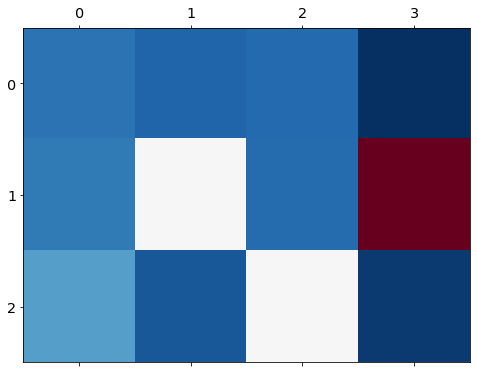

In [9]:
# Initialize V(s) - value function
# Again a dict with keys as states
# Random initialization of all Values where action is needed
# zero for terminal states
V = {}

for s in states:
    
    if s in grid.actions:
        V[s] = np.random.random()
    else:
        V[s] = 0

# Initial value for all states in grid
# print(V)
print_values(V, grid)
show_grid(V)

In [10]:
# All changes from the policy iterations will be imployed here
# repeat until convergence
# V[s] = max[a]{ sum[s',r] { p(s',r|s,a)[r + gamma*V[s']] } }

iter = 0

while True:
    iter += 1
    print("values %d: " % iter)
    print_values(V, grid)
    print("policy %d: " % iter)
    print_policy(policy, grid)
      
    biggest_change = 0
    for s in states:
        old_v = V[s]

        # V(s) only has value if it's not a terminal state
        if s in policy:
            new_v = -np.inf
            for a in ALL_POSSIBLE_ACTIONS:
                grid.set_state(s) # Pick the point of this state 
                r = grid.move(a) # Get the Reward
                v = r + GAMMA * V[grid.current_state()] # get Value for current location and
                if v > new_v:
                    new_v = v
            V[s] = new_v
            
            biggest_change = max(biggest_change, np.abs(old_v - V[s]))

    if biggest_change < SMALL_ENOUGH:
        break
        
# find a policy that leads to optimal value function
for s in policy.keys():
    best_a = None
    best_value = -np.inf
    # loop through all possible actions to find the best current action
    for a in ALL_POSSIBLE_ACTIONS:
        grid.set_state(s)
        r = grid.move(a)
        v = r + GAMMA * V[grid.current_state()]
        if v > best_value:
            best_value = v
            best_a = a
    policy[s] = best_a

# our goal here is to verify that we get the same answer as with policy iteration
print("values:")
print_values(V, grid)
print("policy:")
print_policy(policy, grid)

values 1: 
---------------------------
 0.74| 0.80| 0.78| 0.00|
---------------------------
 0.71| 0.00| 0.77| 0.00|
---------------------------
 0.55| 0.85| 0.00| 0.95|
policy 1: 
---------------------------
  L  |  U  |  R  |     |
---------------------------
  L  |     |  R  |     |
---------------------------
  R  |  L  |  L  |  U  |
values 2: 
---------------------------
 0.60| 0.66| 1.00| 0.00|
---------------------------
 0.60| 0.00| 0.64| 0.00|
---------------------------
 0.57| 0.71| 0.81| 0.81|
policy 2: 
---------------------------
  L  |  U  |  R  |     |
---------------------------
  L  |     |  R  |     |
---------------------------
  R  |  L  |  L  |  U  |
values 3: 
---------------------------
 0.71| 0.85| 1.00| 0.00|
---------------------------
 0.47| 0.00| 0.85| 0.00|
---------------------------
 0.53| 0.67| 0.71| 0.67|
policy 3: 
---------------------------
  L  |  U  |  R  |     |
---------------------------
  L  |     |  R  |     |
---------------------------
  R  

[[ 0.7075      0.85        1.          1.        ]
 [ 0.572125    0.          0.85       -1.        ]
 [ 0.44351875  0.572125    0.7075      0.572125  ]]


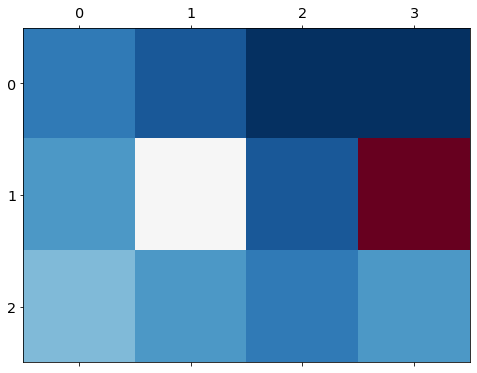

In [11]:
show_grid(V)